In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [11]:
# Load Dataset
df = pd.read_csv("/content/amazon_reviews.csv")
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [15]:
# Sentiment Analysis
# Fill missing values in 'reviewText' with an empty string
df['reviewText'] = df['reviewText'].fillna('')

df["polarity"] = df['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df['reviewText'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

def classify_sentiment(p):
    if p > 0.1:
        return "Positive"
    elif p < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["polarity"].apply(classify_sentiment)
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,0.000000,0.000,Neutral
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,0.200000,0.200,Positive
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,0.129167,0.525,Positive
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,0.000000,0.550,Neutral
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,0.386667,0.360,Positive


/tmp/ipython-input-1534817439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="sentiment", data=df, palette="Set2")


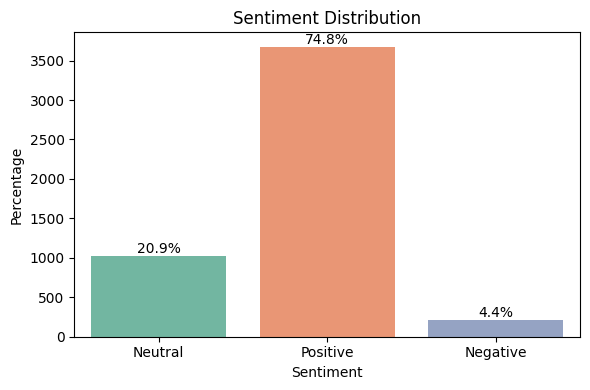

In [19]:
# Sentiment Distribution Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Percentage") # Change ylabel to Percentage
plt.tight_layout()

# Calculate percentages and add labels
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

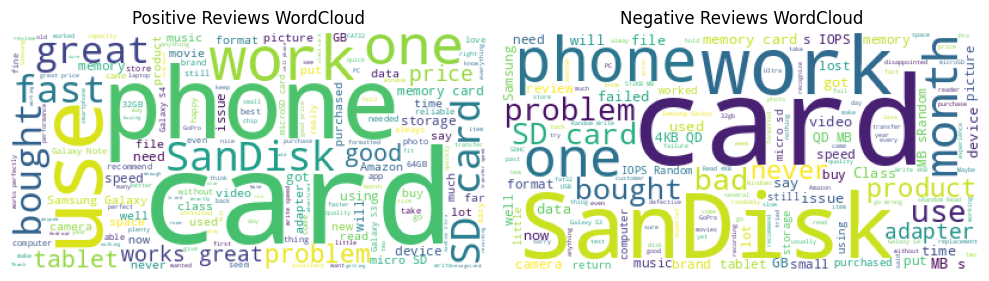

In [18]:
# WordClouds
positive_text = " ".join(df[df["sentiment"] == "Positive"]["reviewText"])
negative_text = " ".join(df[df["sentiment"] == "Negative"]["reviewText"])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color="white").generate(positive_text))
plt.axis("off")
plt.title("Positive Reviews WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color="white").generate(negative_text))
plt.axis("off")
plt.title("Negative Reviews WordCloud")

plt.tight_layout()
plt.show()